In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd 
import os

In [4]:
# Pandas
import pandas as pd

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical


# Audio
import librosa
import librosa.display

# Plot
import matplotlib.pyplot as plt

# Utility
import glob
import numpy as np
from tqdm import tqdm
import IPython.display as ipd
from timeit import default_timer as timer

In [5]:
class_code = {'code0': 0, 'code1': 1, 'code2': 2, 'code3': 3, 'code4': 4, 'code5': 5} 

In [6]:
# Building our dataset
dataset = list()
for folder in glob.glob('CNN_all/cut_from5_to35/'):
    list_sounds_path = glob.glob(folder+"//**")
    for elm in list_sounds_path:
        elm1 = elm.split("/")[2]
        idx = elm1.find('_')
        label = elm1[:idx]
        dataset.append({"file_name" : elm,
                       "label" : class_code[label]})
        pass
    pass
pass
dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state = 42)

In [7]:
dataset.head(10)

,file_name,label
438,CNN_all/cut_from5_to35/code3_crying-man_36.wav,3
570,CNN_all/cut_from5_to35/code5_normal_2(time9300...,5
567,CNN_all/cut_from5_to35/code3_crying-man_B09.wav,3
534,CNN_all/cut_from5_to35/code5_normal_3(time1500...,5
1617,CNN_all/cut_from5_to35/code1_candid-cam_D70.wav,1
135,CNN_all/cut_from5_to35/code1_candid-cam_C02.wav,1
1302,CNN_all/cut_from5_to35/code0_injury_B21.wav,0
70,CNN_all/cut_from5_to35/code3_crying-man_A36.wav,3
342,CNN_all/cut_from5_to35/code0_robber_B_26.wav,0
289,CNN_all/cut_from5_to35/code0_dating-violence_2...,0


In [8]:
train, test = train_test_split(dataset, test_size = 0.2, random_state = 42)

In [9]:
print(train.shape)
print(test.shape)

(1337, 2)
(335, 2)


In [10]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
    return mfccs

In [11]:
x_train = list()
y_train = list()
for i in tqdm(range(len(train))):
    x_train.append(extract_feature(train.file_name.iloc[i]))
    y_train.append(train.label.iloc[i])
    pass
pass

100%|██████████| 1337/1337 [25:52<00:00,  1.16s/it]


In [12]:
x_test = list()
y_test = list()
for i in tqdm(range(len(test))):
    x_test.append(extract_feature(test.file_name.iloc[i]))
    y_test.append(test.label.iloc[i])
    pass
pass

100%|██████████| 335/335 [06:22<00:00,  1.14s/it]


In [13]:
print("x_train",len(x_train),"y_train", len(y_train))

x_train 1337 y_train 1337


In [14]:
X_train, Y_train = list(), list()
train_x = list()
train_y = list()
for x,y in zip(x_train,y_train):
    train_x.append(x.shape)
    train_y.append(y.shape)
    X_train.append(x)
    Y_train.append(y)

In [15]:
X_test, Y_test = list(), list()
test_x = list()
test_y = list()
for x,y in zip(x_test,y_test):
    test_x.append(x.shape)
    test_y.append(y.shape)
    X_test.append(x)
    Y_test.append(y)

In [16]:
# 오디오 재생시간이 다르기 때문에 프레임 수가 각각 다름
print(test_x.sort(reverse=True))
test_x

None


[(40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),
 (40, 1292),

In [17]:
# Q. 주요 특성이 (40,1292)인가?? 
X_train, Y_train = list(), list()
for x,y in zip(x_train,y_train):
    if x.shape == (40, 1292):
        X_train.append(x)
        Y_train.append(y)
        pass
    pass
pass

In [18]:
X_test, Y_test = list(), list()
for x,y in zip(x_test,y_test):
    if x.shape == (40, 1292):
        X_test.append(x)
        Y_test.append(y)
        pass
    pass
pass

In [19]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [20]:
print(X_train.shape)
print(X_test.shape)

(1088, 40, 1292)
(269, 40, 1292)


In [21]:
# time : 전체 쉘에 대한 Wall time
# LabelEncoder() : 문자를 숫자(수치화), 숫자를 문자로 매핑
%%time
encoder = LabelEncoder()
encoder.fit(Y_train)

Y_train = encoder.transform(Y_train)
Y_test = encoder.transform(Y_test)

UsageError: Line magic function `%%time` not found.


In [22]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
Y_train1 = to_categorical(Y_train)
Y_test1 = to_categorical(Y_test)

In [23]:
X_test.shape

(269, 40, 1292, 1)

In [27]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(40, 1292, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(6, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [29]:
history = model.fit(X_train, Y_train1,
              batch_size=128,
              epochs=300,
              validation_data=(X_test, Y_test1),
              shuffle=True)

Epoch 1/300
9/9 [==============================] - 9s 923ms/step - loss: 4.8429 - accuracy: 0.2785 - val_loss: 1.4337 - val_accuracy: 0.2751
Epoch 2/300
9/9 [==============================] - 8s 903ms/step - loss: 1.6603 - accuracy: 0.4108 - val_loss: 1.0990 - val_accuracy: 0.6059
Epoch 3/300
9/9 [==============================] - 8s 909ms/step - loss: 1.4472 - accuracy: 0.4283 - val_loss: 1.0653 - val_accuracy: 0.5576
Epoch 4/300
9/9 [==============================] - 8s 904ms/step - loss: 1.1905 - accuracy: 0.5092 - val_loss: 1.1264 - val_accuracy: 0.4424
Epoch 5/300
9/9 [==============================] - 8s 906ms/step - loss: 1.0655 - accuracy: 0.5294 - val_loss: 1.0820 - val_accuracy: 0.4387
Epoch 6/300
9/9 [==============================] - 8s 905ms/step - loss: 0.9396 - accuracy: 0.5901 - val_loss: 1.0041 - val_accuracy: 0.4796
Epoch 7/300
9/9 [==============================] - 8s 901ms/step - loss: 0.8953 - accuracy: 0.6186 - val_loss: 0.9079 - val_accuracy: 0.5465
Epoch 8/300
9

Text(0.5, 1.0, 'Accuracy Curves')

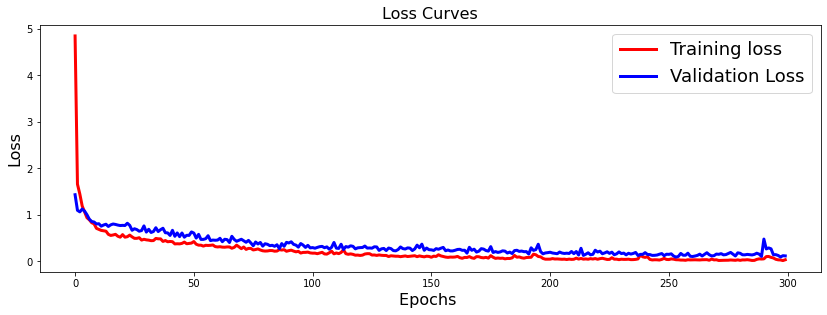

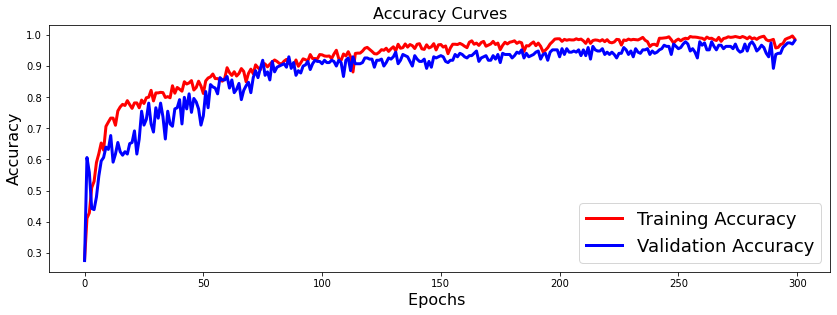

In [30]:
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [32]:
model.save("CNN_code_model.h5")